# whole surface, except boundary (10 cells) and onshelf

In [1]:
#mask tidal forcing
import xarray as xr
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv, find_dotenv

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

src_dir = os.environ.get('srcdir')
print(src_dir)

sys.path.append(src_dir)

# always reload modules marked with "%aimport"
%load_ext autoreload
%autoreload 1

%aimport features.grid_ttide
from features.grid_ttide import grid_ttide, plot_M2O1_diff

from visualization.plot_barotropic_xr import plot_uv
from visualization.plot_dpt import plot_timeseries

%aimport visualization.plot_barotropic_xr, visualization.plot_dpt

/home/ubuntu/bigStick/tidal_melting/src


/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [3]:
tds_path = os.path.join(os.environ.get('rawdir'),'gdata','waom10_data','waom10_tds.nc')
tds_ds = xr.open_dataset(tds_path)
grid_path =  os.path.join(os.environ.get('rawdir'),'gdata','waom10_data','waom10_grd.nc')
grid_ds = xr.open_dataset(grid_path)

In [7]:
tds_ds['tide_Eamp'] = tds_ds.tide_Pamp.rename('tide_Eamp')
tds_ds['tide_Ephase'] = tds_ds.tide_Pphase.rename('tide_Ephase')

In [143]:
tds_ds.tide_Eamp[:] = tds_ds.tide_Eamp.where((grid_ds.h > 1000),0.0)

In [145]:
tds_ds['tide_Eamp'][:,0:11,:] = 0.0
tds_ds['tide_Eamp'][:,:,0:11] = 0.0
tds_ds['tide_Eamp'][:,-10:,:] = 0.0
tds_ds['tide_Eamp'][:,:,-10:] = 0.0

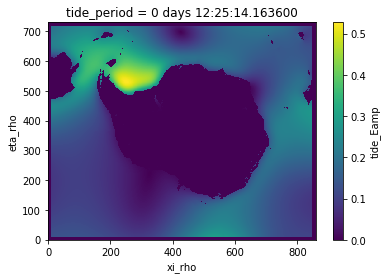

In [146]:
%matplotlib inline
plt.close()
tds_ds.tide_Eamp[0].plot()
plt.show()

In [147]:
out_path = os.path.join(os.environ.get('rawdir'),'waom10_SSH_hack','waom10_tds_SSH_full.nc')
tds_ds.to_netcdf(out_path,'w',unlimited_dims='tide_period')

## Results
... blowup after 2 days! (ramping is 10 days)

# 50 cell frame

In [148]:
tds_ds['tide_Eamp'][:,0:50,:] = 0.0
tds_ds['tide_Eamp'][:,:,0:50] = 0.0
tds_ds['tide_Eamp'][:,-49:,:] = 0.0
tds_ds['tide_Eamp'][:,:,-49:] = 0.0

In [149]:
tds_ds['tide_Eamp'][:,101:-100,101:-100] = 0.0

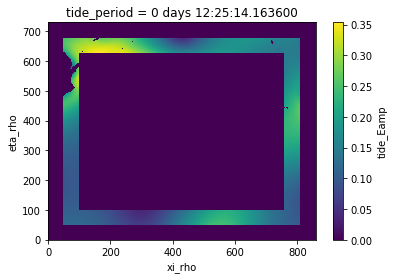

In [150]:
%matplotlib inline
plt.close()
tds_ds.tide_Eamp[0].plot()
plt.show()

In [151]:
out_path = os.path.join(os.environ.get('rawdir'),'waom10_SSH_hack','waom10_tds_SSH_50frame.nc')
tds_ds.to_netcdf(out_path,'w',unlimited_dims='tide_period')

## Results
... blowup after 15 days!
### M2 O1 ampl against TPXO

In [14]:
#look at results
file_path = os.path.join(os.environ.get('rawdir'),'waom10_SSH_hack','ocean_his_50frame_0001.nc')
bigframe = xr.open_mfdataset(file_path,chunks={'xi_rho':100,'eta_rho':100})

In [ ]:
%%time
bigframe = grid_ttide(bigframe.zeta,bigframe,res=20)

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)


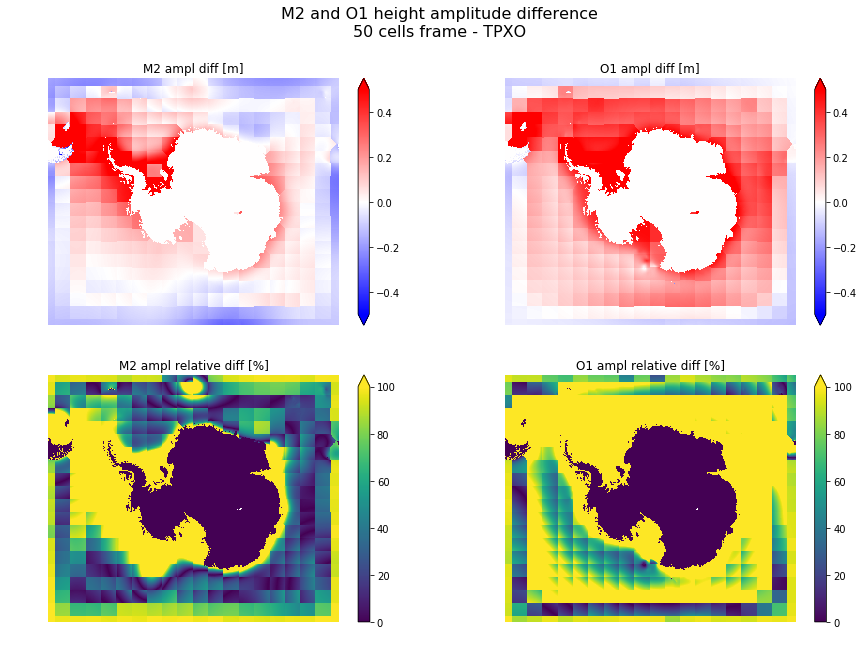

In [24]:
plot_M2O1_diff(bigframe,'50 cells frame',tds_ds,'TPXO',vmin=-0.50,vmax=0.50)

# 10 cell frame

In [152]:
tds_ds['tide_Eamp'][:,0:90,:] = 0.0
tds_ds['tide_Eamp'][:,:,0:90] = 0.0
tds_ds['tide_Eamp'][:,-89:,:] = 0.0
tds_ds['tide_Eamp'][:,:,-89:] = 0.0

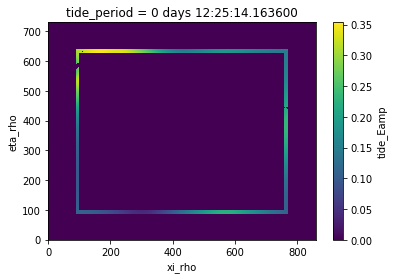

In [153]:
%matplotlib inline
plt.close()
tds_ds.tide_Eamp[0].plot()
plt.show()

In [154]:
out_path = os.path.join(os.environ.get('rawdir'),'waom10_SSH_hack','waom10_tds_SSH_10frame.nc')
tds_ds.to_netcdf(out_path,'w',unlimited_dims='tide_period')

# 2 cell frame

In [155]:
tds_ds['tide_Eamp'][:,0:98,:] = 0.0
tds_ds['tide_Eamp'][:,:,0:98] = 0.0
tds_ds['tide_Eamp'][:,-97:,:] = 0.0
tds_ds['tide_Eamp'][:,:,-97:] = 0.0

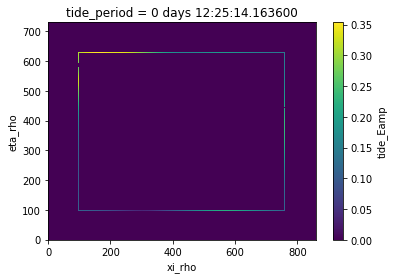

In [156]:
%matplotlib inline
plt.close()
tds_ds.tide_Eamp[0].plot()
plt.show()

In [ ]:
out_path = os.path.join(os.environ.get('rawdir'),'waom10_SSH_hack','waom10_tds_SSH_2frame.nc')
tds_ds.to_netcdf(out_path,'w',unlimited_dims='tide_period')

## Results
... full NTIMES with 30 days.
### M2 O1 ampl against TPXO

In [17]:
#look at results
file_path = os.path.join(os.environ.get('rawdir'),'waom10_SSH_hack','ocean_his_2frame_0001.nc')
smallframe = xr.open_mfdataset(file_path,chunks={'xi_rho':100,'eta_rho':100})

In [ ]:
smallframe = grid_ttide(smallframe.zeta,smallframe,res=50)

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)
/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


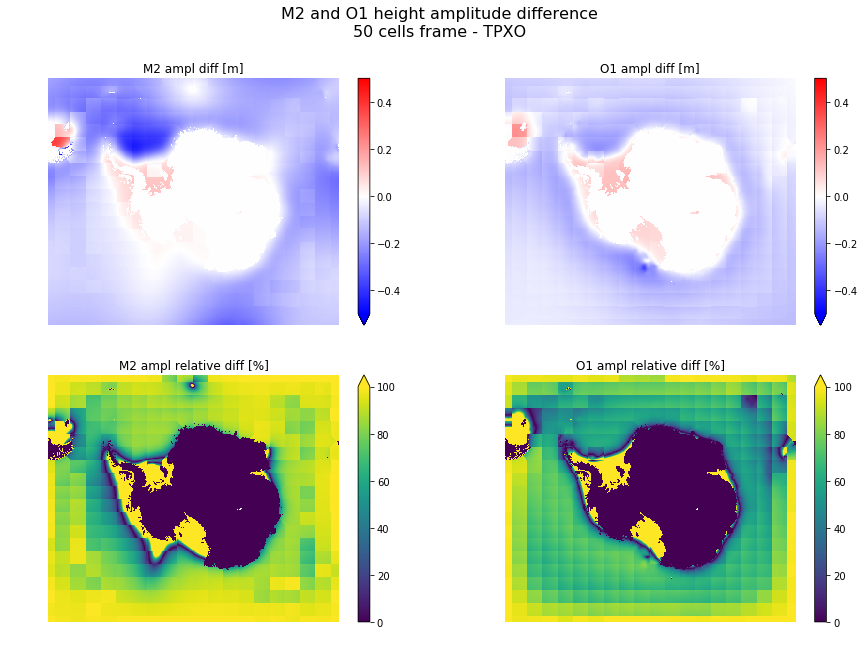

In [19]:
plot_M2O1_diff(smallframe,'50 cells frame',tds_ds,'TPXO',vmin=-0.50,vmax=0.50)

### 14 day mean barotropic currents

In [20]:
file_path = os.path.join(os.environ.get('rawdir'),'waom10_SSH_hack','ocean_avg_2frame.nc')
smallframe_avg = xr.open_mfdataset(file_path)

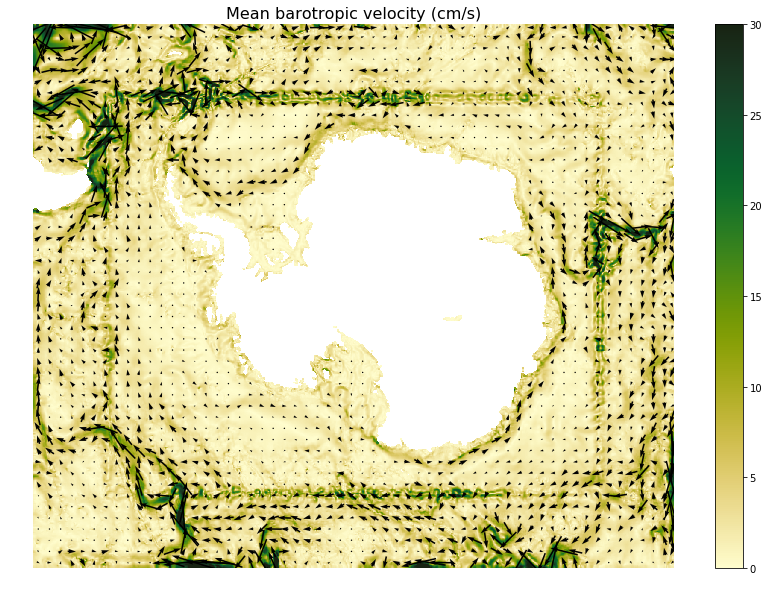

In [21]:
plot_uv(smallframe_avg.isel(ocean_time=-1))

# 1 cell frame

In [158]:
tds_ds['tide_Eamp'][:,0:99,:] = 0.0
tds_ds['tide_Eamp'][:,:,0:99] = 0.0
tds_ds['tide_Eamp'][:,-98:,:] = 0.0
tds_ds['tide_Eamp'][:,:,-98:] = 0.0

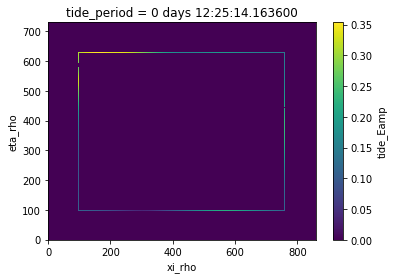

In [159]:
%matplotlib inline
plt.close()
tds_ds.tide_Eamp[0].plot()
plt.show()

In [160]:
out_path = os.path.join(os.environ.get('rawdir'),'waom10_SSH_hack','waom10_tds_SSH_1frame.nc')
tds_ds.to_netcdf(out_path,'w',unlimited_dims='tide_period')

# 3 deg lat ring

In [209]:
tds_ds['tide_Eamp'] = tds_ds.tide_Pamp.rename('tide_Eamp').copy()
tds_ds['tide_Ephase'] = tds_ds.tide_Pphase.rename('tide_Ephase').copy()

In [210]:
tds_ds.tide_Eamp[:] = tds_ds.tide_Eamp.where(((grid_ds.lat_rho < -57) & (grid_ds.lat_rho > -60)),0.0)

In [211]:
tds_ds['tide_Eamp'][:,0:11,:] = 0.0
tds_ds['tide_Eamp'][:,:,0:11] = 0.0
tds_ds['tide_Eamp'][:,-10:,:] = 0.0
tds_ds['tide_Eamp'][:,:,-10:] = 0.0

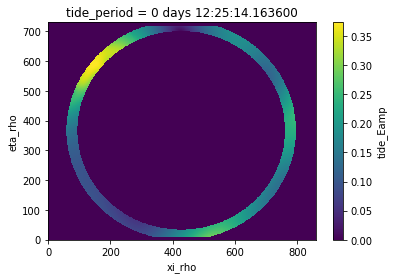

In [193]:
plt.close()
tds_ds.tide_Eamp[0].plot()
plt.show()

In [194]:
out_path = os.path.join(os.environ.get('rawdir'),'waom10_SSH_hack','waom10_tds_SSH_3lat.nc')
tds_ds.to_netcdf(out_path,'w',unlimited_dims='tide_period')

## Results
... blowup after 3 days! (with 10 days ramping)

In [22]:
#look at results
file_path = os.path.join(os.environ.get('rawdir'),'waom10_SSH_hack','ocean_his_3lat_0001.nc')
latframe = xr.open_mfdataset(file_path,chunks={'xi_rho':100,'eta_rho':100})

In [ ]:
latframe = grid_ttide(latframe.zeta,latframe,res=20)

In [ ]:
plot_M2O1_diff(latframe,'50 cells frame',tds_ds,'TPXO',vmin=-0.50,vmax=0.50)

# 3 deg lat ring individual points

In [208]:
import numpy as np
xi = np.arange(0,grid_ds.xi_rho.size)
xi_mask = np.delete(xi,np.arange(0,grid_ds.xi_rho.size,10))
eta = np.arange(0,grid_ds.eta_rho.size)
eta_mask = np.delete(eta,np.arange(0,grid_ds.eta_rho.size,10))

In [214]:
tds_ds['tide_Eamp'][:,eta_mask,xi_mask] = 0.0

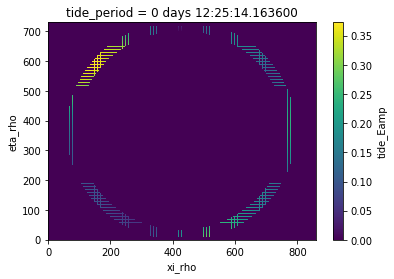

In [215]:
plt.close()
tds_ds.tide_Eamp[0].plot()
plt.show()

In [216]:
out_path = os.path.join(os.environ.get('rawdir'),'waom10_SSH_hack','waom10_tds_SSH_3lat_raster.nc')
tds_ds.to_netcdf(out_path,'w',unlimited_dims='tide_period')

## Results
... full NTIMES with 30 days.
### M2 O1 ampl against TPXO

In [26]:
#look at results
file_path = os.path.join(os.environ.get('rawdir'),'waom10_SSH_hack','ocean_his_3lat_raster_0001.nc')
raster = xr.open_mfdataset(file_path,chunks={'xi_rho':100,'eta_rho':100})

In [31]:
raster = grid_ttide(raster.zeta,raster,res=50)

setting up the new fields  ['amp', 'amp_err', 'phase', 'phase_err']  for  ['O1', 'M2']
applying t_tide to every  50 th cell ...


VBox(children=(HTML(value=''), IntProgress(value=0, max=50)))

interpolating intermediate cells and mask land


/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)


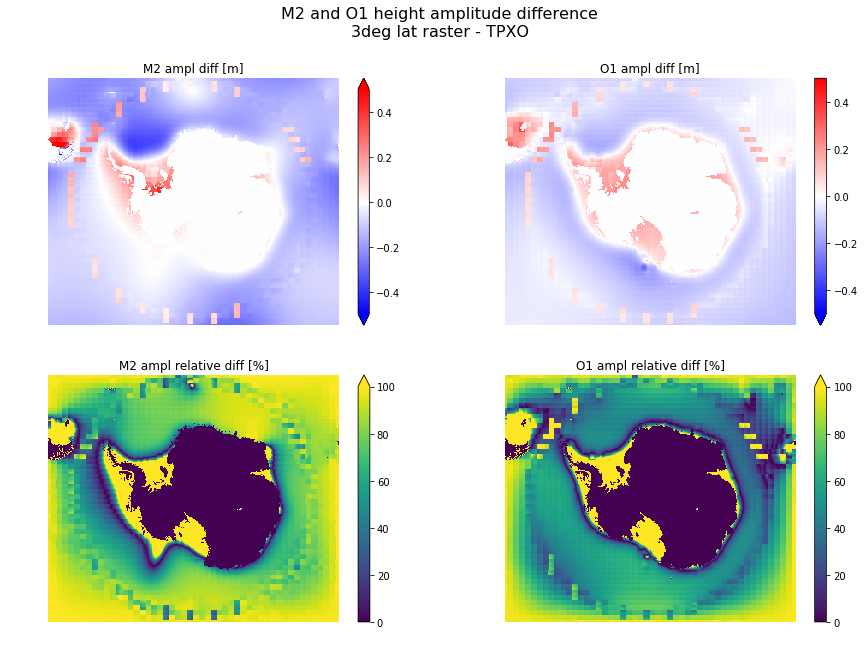

In [33]:
plot_M2O1_diff(raster,'3deg lat raster',tds_ds,'TPXO',vmin=-0.50,vmax=0.50)

### 14 day mean barotropic currents

In [240]:
file_path = os.path.join(os.environ.get('rawdir'),'waom10_SSH_hack','ocean_avg_3lat_raster.nc')
raster_avg = xr.open_mfdataset(file_path)

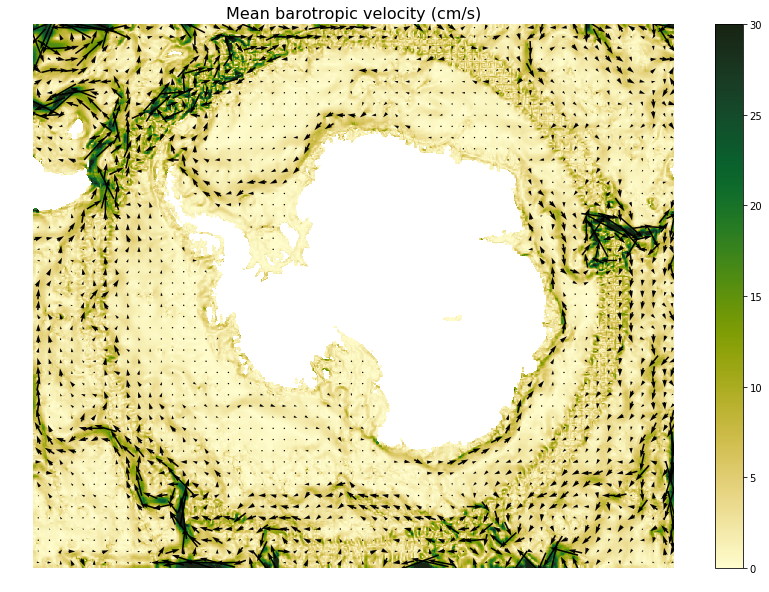

In [246]:
plot_uv(raster_avg.isel(ocean_time=-1))